In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import glob
import numpy as np

dossier = "/content/drive/MyDrive/redshift"
os.chdir(dossier)

# Lister tous les fichiers .npz du dossier
npz_files = glob.glob("*.npz")

# Filtrer uniquement les fichiers contenant "COSMOS"
cosmos_files = [f for f in npz_files if "COSMOS" in f]

# Charger chaque fichier dans un dictionnaire séparé
cosmos_data = {}
for fichier in cosmos_files:
    try:
        cosmos_data[fichier] = np.load(fichier, allow_pickle=True)
        print(f"Chargé : {fichier}")
    except Exception as e:
        print(f"Erreur lors du chargement de {fichier} : {e}")

# Afficher les clés et les shapes de chaque fichier séparément
for nom, data in cosmos_data.items():
    print(f"\n=== {nom} ===")
    for key in data.keys():
        print(f"  - {key} : {data[key].shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Chargé : COSMOS_v11_uijk_0001_photo_D.npz
Chargé : COSMOS_v11_uijk_0213_photo_UD.npz
Chargé : COSMOS_v11_uijk_0020_spec_D.npz
Chargé : COSMOS_v11_uijk_0073_spec_UD.npz

=== COSMOS_v11_uijk_0001_photo_D.npz ===
  - cube : (12054, 64, 64, 9)
  - info : (12054,)
  - flag : (12054, 9)

=== COSMOS_v11_uijk_0213_photo_UD.npz ===
  - cube : (443, 64, 64, 9)
  - info : (443,)
  - flag : (443, 9)

=== COSMOS_v11_uijk_0020_spec_D.npz ===
  - cube : (15, 64, 64, 9)
  - info : (15,)
  - flag : (15, 9)

=== COSMOS_v11_uijk_0073_spec_UD.npz ===
  - cube : (12, 64, 64, 9)
  - info : (12,)
  - flag : (12, 9)


In [ ]:
# Séparer les fichiers COSMOS en deux groupes : spec et phot
spec_files = [f for f in cosmos_files if "spec" in f.lower()]
phot_files = [f for f in cosmos_files if "phot" in f.lower()]

print("Fichiers SPEC:", spec_files)
print("Fichiers PHOT:", phot_files)

# Charger les données spec
spec_data = np.load(spec_files[0], allow_pickle=True)

# Charger les données phot
phot_data = np.load(phot_files[0], allow_pickle=True)

# Voir ce qu'il y a dans chacun
print("\n=== SPEC ===")
for key in spec_data.keys():
    print(f"  - {key} : {spec_data[key].shape}")

print("\n=== PHOT ===")
for key in phot_data.keys():
    print(f"  - {key} : {phot_data[key].shape}")

Fichiers SPEC: ['COSMOS_v11_uijk_0020_spec_D.npz', 'COSMOS_v11_uijk_0073_spec_UD.npz']
Fichiers PHOT: ['COSMOS_v11_uijk_0001_photo_D.npz', 'COSMOS_v11_uijk_0213_photo_UD.npz']

=== SPEC ===
  - cube : (15, 64, 64, 9)
  - info : (15,)
  - flag : (15, 9)

=== PHOT ===
  - cube : (12054, 64, 64, 9)
  - info : (12054,)
  - flag : (12054, 9)


In [ ]:
# Extraire ce dont tu as besoin (adapte les noms des clés selon ce que tu vois)
spec_info = spec_data["info"]
phot_info = phot_data["info"]



# Convertir en DataFrame pandas pour faciliter la manipulation
spec_df = pd.DataFrame(spec_info)
phot_df = pd.DataFrame(phot_info)

# Renommer les colonnes cibles
spec_df = spec_df.rename(columns={"ZSPEC": "redshift"})
phot_df = phot_df.rename(columns={"ZPHOT": "redshift"})

# Vérifier
print("Colonnes SPEC:", spec_df.columns.tolist())
print("Colonnes PHOT:", phot_df.columns.tolist())

# Vérifier la colonne z dans chacun
print("\nSpec z:", spec_df["redshift"].head())
print("Phot z:", phot_df["redshift"].head())

Colonnes SPEC: ['ID', 'RA', 'DEC', 'TRACT', 'PATCH', 'MASK', 'FLAG_FIELD', 'EB_V', 'CLASS_STAR_HSC_I', 'u', 'uS', 'g', 'r', 'i', 'z', 'y', 'J', 'H', 'Ks', 'u_err', 'uS_err', 'g_err', 'r_err', 'i_err', 'z_err', 'y_err', 'J_err', 'H_err', 'Ks_err', 'ZPHOT', 'OBJ_TYPE', 'COMPACT', 'STAR_FORMING', 'ST_TRAIL', 'CLEAN', 'EBV', 'LABEL', 'SURVEY', 'RA_zs', 'DEC_zs', 'redshift', 'ZFLAG', 'CLASS']
Colonnes PHOT: ['ID', 'RA', 'DEC', 'TRACT', 'PATCH', 'MASK', 'FLAG_FIELD', 'EB_V', 'CLASS_STAR_HSC_I', 'u', 'uS', 'g', 'r', 'i', 'z', 'y', 'J', 'H', 'Ks', 'u_err', 'uS_err', 'g_err', 'r_err', 'i_err', 'z_err', 'y_err', 'J_err', 'H_err', 'Ks_err', 'redshift', 'OBJ_TYPE', 'COMPACT', 'STAR_FORMING', 'ST_TRAIL', 'CLEAN', 'EBV', 'LABEL']

Spec z: 0    0.494861
1    0.033066
2    0.718559
3    0.052223
4    0.618703
Name: redshift, dtype: float32
Phot z: 0    1.5828
1    1.4990
2    1.8435
3    1.9597
4    1.7914
Name: redshift, dtype: float64


In [ ]:
# Garder uniquement les magnitudes
magnitudes = ['u', 'g', 'r', 'i', 'z', 'y','EBV']

spec_mag = spec_df[magnitudes + ['redshift']].copy()
phot_mag = phot_df[magnitudes + ['redshift']].copy()

# Créer les couleurs (différences entre magnitudes voisines)
for df in [spec_mag, phot_mag]:
    df['u_g'] = df['u'] - df['g']
    df['g_r'] = df['g'] - df['r']
    df['r_i'] = df['r'] - df['i']
    df['i_z'] = df['i'] - df['z']
    df['z_y'] = df['z'] - df['y']

# Vérifier
print("Colonnes SPEC:", spec_mag.columns.tolist())
print(spec_mag.head())

print("\nColonnes PHOT:", phot_mag.columns.tolist())
print(phot_mag.head())

Colonnes SPEC: ['u', 'g', 'r', 'i', 'z', 'y', 'EBV', 'redshift', 'u_g', 'g_r', 'r_i', 'i_z', 'z_y']
        u       g       r       i       z       y       EBV  redshift  \
0 -99.111  22.282  20.542  19.600  19.164  19.027  0.027616  0.494861   
1 -99.130  18.177  17.541  17.289  17.007  16.874  0.031596  0.033066   
2 -99.139  20.408  20.208  20.182  19.980  20.195  0.034874  0.718559   
3 -99.142  20.554  20.096  19.886  19.726  19.639  0.034874  0.052223   
4 -99.124  22.086  20.612  19.578  19.220  19.104  0.030885  0.618703   

       u_g    g_r    r_i    i_z    z_y  
0 -121.393  1.740  0.942  0.436  0.137  
1 -117.307  0.636  0.252  0.282  0.133  
2 -119.547  0.200  0.026  0.202 -0.215  
3 -119.696  0.458  0.210  0.160  0.087  
4 -121.210  1.474  1.034  0.358  0.116  

Colonnes PHOT: ['u', 'g', 'r', 'i', 'z', 'y', 'EBV', 'redshift', 'u_g', 'g_r', 'r_i', 'i_z', 'z_y']
        u       g       r       i       z       y       EBV  redshift    u_g  \
0  27.456  27.788  28.223  28.558 

In [ ]:
# Filtrer les données : garder uniquement redshift <= 1
spec_mag = spec_mag[spec_mag['redshift'] <= 1].copy()
phot_mag = phot_mag[phot_mag['redshift'] <= 1].copy()

print(f"SPEC après filtre : {len(spec_mag)} objets")
print(f"PHOT après filtre : {len(phot_mag)} objets")

# Vérifier
print("\nSpec redshift min/max:", spec_mag['redshift'].min(), spec_mag['redshift'].max())
print("Phot redshift min/max:", phot_mag['redshift'].min(), phot_mag['redshift'].max())

SPEC après filtre : 13 objets
PHOT après filtre : 3080 objets

Spec redshift min/max: 0.00025822818861342967 0.7185590863227844
Phot redshift min/max: 0.01 0.9997


In [ ]:
# 1. Vérifier les valeurs manquantes
print("=== Valeurs manquantes SPEC ===")
print(spec_mag.isnull().sum())

print("\n=== Valeurs manquantes PHOT ===")
print(phot_mag.isnull().sum())

# 2. Vérifier les valeurs infinies
print("\n=== Valeurs infinies SPEC ===")
print(np.isinf(spec_mag.select_dtypes(include=np.number)).sum())

print("\n=== Valeurs infinies PHOT ===")
print(np.isinf(phot_mag.select_dtypes(include=np.number)).sum())

# 3. Statistiques générales
print("\n=== Stats SPEC ===")
print(spec_mag.describe())

print("\n=== Stats PHOT ===")
print(phot_mag.describe())

=== Valeurs manquantes SPEC ===
u           0
g           0
r           0
i           0
z           0
y           0
EBV         0
redshift    0
u_g         0
g_r         0
r_i         0
i_z         0
z_y         0
dtype: int64

=== Valeurs manquantes PHOT ===
u           0
g           0
r           0
i           0
z           0
y           0
EBV         0
redshift    0
u_g         0
g_r         0
r_i         0
i_z         0
z_y         0
dtype: int64

=== Valeurs infinies SPEC ===
u           0
g           0
r           0
i           0
z           0
y           0
EBV         0
redshift    0
u_g         0
g_r         0
r_i         0
i_z         0
z_y         0
dtype: int64

=== Valeurs infinies PHOT ===
u           0
g           0
r           0
i           0
z           0
y           0
EBV         0
redshift    0
u_g         0
g_r         0
r_i         0
i_z         0
z_y         0
dtype: int64

=== Stats SPEC ===
               u          g          r          i          z          y  

In [ ]:
# Les -99 sont des valeurs manquantes déguisées en astronomie
# On filtre toutes les lignes où une magnitude vaut -99

magnitudes = ['u', 'g', 'r', 'i', 'z', 'y','EBV']

# Remplacer les -99 par NaN puis supprimer ces lignes
for df_name, df in [('spec_mag', spec_mag), ('phot_mag', phot_mag)]:
    df.replace(-99, np.nan, inplace=True)
    # Aussi capturer les valeurs proches de -99 (ex: -99.1, -99.05...)
    for col in magnitudes:
        df.loc[df[col] < -90, col] = np.nan

spec_mag = spec_mag.dropna(subset=magnitudes).copy()
phot_mag = phot_mag.dropna(subset=magnitudes).copy()

# Recalculer les couleurs après nettoyage
for df in [spec_mag, phot_mag]:
    df['u_g'] = df['u'] - df['g']
    df['g_r'] = df['g'] - df['r']
    df['r_i'] = df['r'] - df['i']
    df['i_z'] = df['i'] - df['z']
    df['z_y'] = df['z'] - df['y']

print(f"SPEC après nettoyage : {len(spec_mag)} objets")
print(f"PHOT après nettoyage : {len(phot_mag)} objets")

print("\n=== Stats SPEC ===")
print(spec_mag.describe())
print("\n=== Stats PHOT ===")
print(phot_mag.describe())

SPEC après nettoyage : 0 objets
PHOT après nettoyage : 3026 objets

=== Stats SPEC ===
         u    g    r    i    z    y  EBV  redshift  u_g  g_r  r_i  i_z  z_y
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0  0.0  0.0
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  NaN
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  NaN
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  NaN
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  NaN
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  NaN
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  NaN
max    NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  NaN

=== Stats PHOT ===
                 u            g            r            i            z  \
count  3026.000000  3026.000000  3026.000000  3026.000000  3026.000000   
mean     25.748529    25.236399    24.486187    23.928603    

Train : 2420 objets | Test : 606 objets
Device : cpu
RedshiftNet(
  (network): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)
Epoch 10/100 - Loss: 0.0123
Epoch 20/100 - Loss: 0.0080
Epoch 30/100 - Loss: 0.0067
Epoch 40/100 - Loss: 0.0055
Epoch 50/100 - Loss: 0.0055
Epoch 60/100 - Loss: 0.0048
Epoch 70/100 - Loss: 0.0047
Epoch 80/100 - Loss: 0.0043
Epoch 90/100 - Loss: 0.0038
Epoch 100/100 - Loss: 0.0040
RMSE         : 0.0601
MAE          : 0.0381
R²           : 0.9428
Biais        : -0.0041
Sigma NMAD   : 0.0221
Outliers     : 0.99%


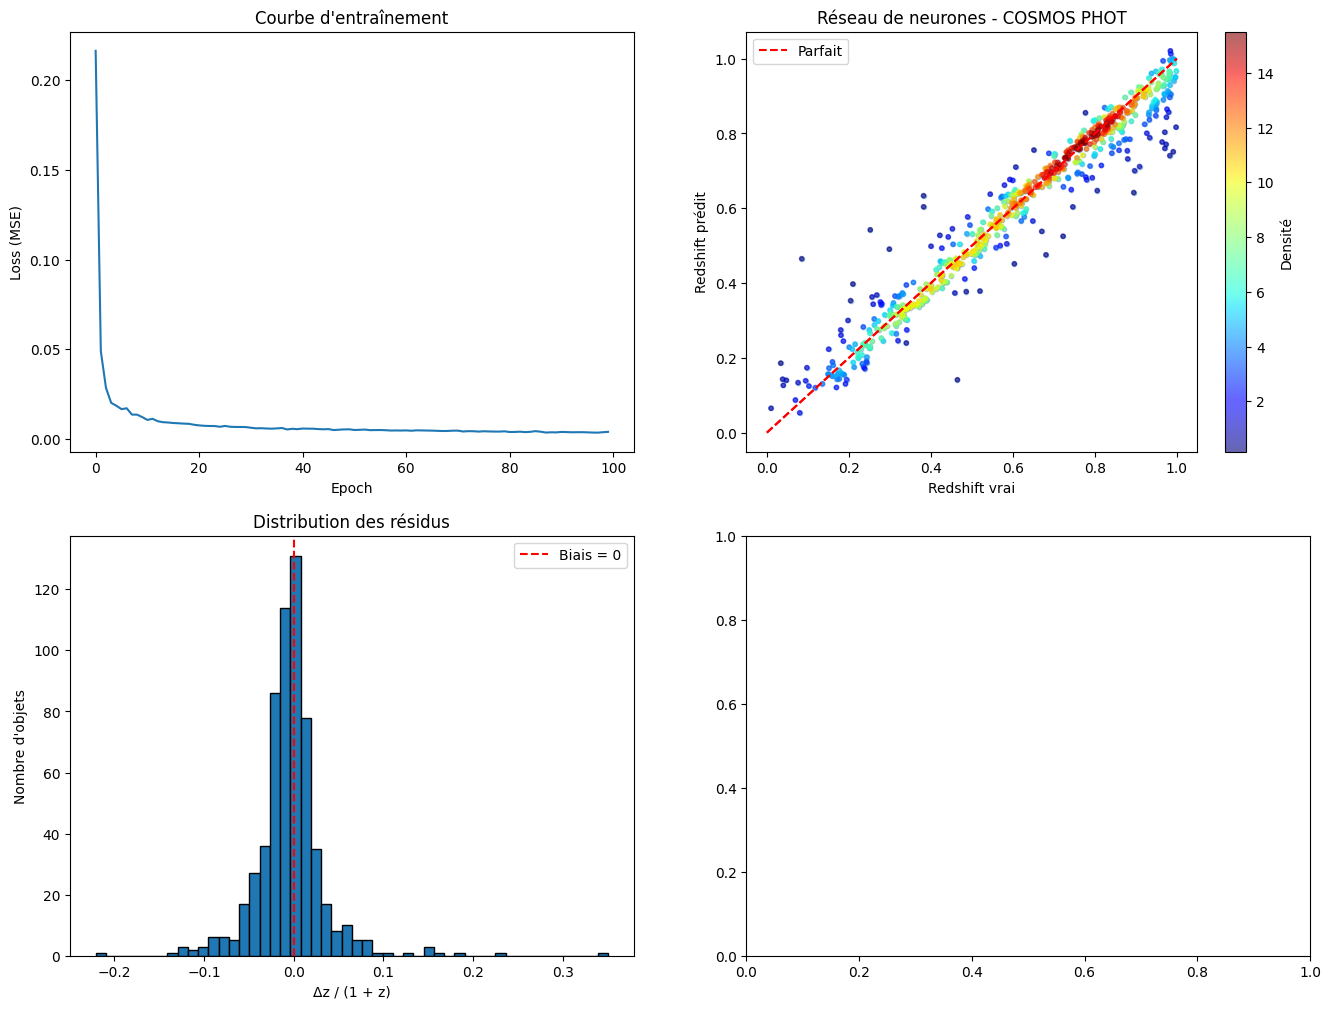

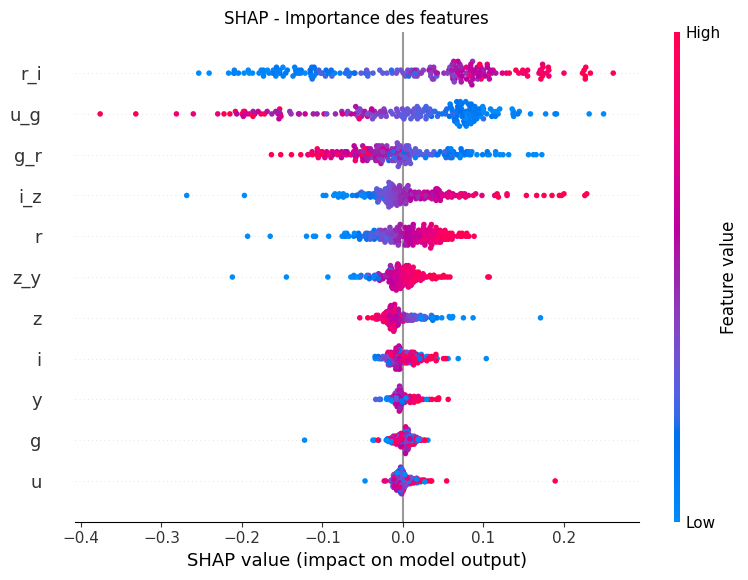

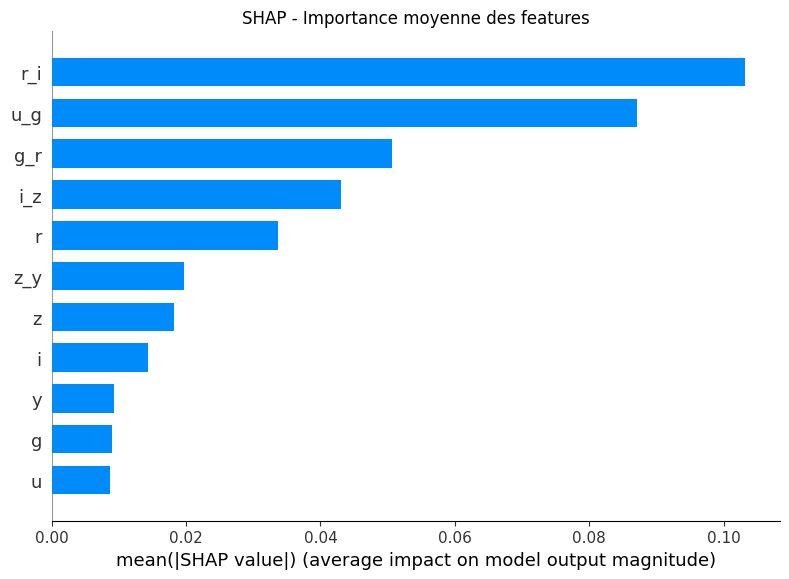

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ============================================================
# 1. PRÉPARER LES DONNÉES
# ============================================================
features = ['u', 'g', 'r', 'i', 'z', 'y', 'u_g', 'g_r', 'r_i', 'i_z', 'z_y']
X = phot_mag[features].values
y = phot_mag['redshift'].values

# Normaliser les features (très important pour les réseaux de neurones)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Train : {len(X_train)} objets | Test : {len(X_test)} objets")

# Convertir en tenseurs PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_t  = torch.tensor(y_test,  dtype=torch.float32).unsqueeze(1)

# DataLoader
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader  = DataLoader(train_dataset, batch_size=64, shuffle=True)

# ============================================================
# 2. DÉFINIR LE RÉSEAU
# ============================================================
class RedshiftNet(nn.Module):
    def __init__(self, input_dim):
        super(RedshiftNet, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

# Utiliser GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device : {device}")

model = RedshiftNet(input_dim=len(features)).to(device)
print(model)

# ============================================================
# 3. ENTRAÎNER LE MODÈLE
# ============================================================
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        y_hat = model(X_batch)
        loss  = criterion(y_hat, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

# ============================================================
# 4. ÉVALUER
# ============================================================
model.eval()
with torch.no_grad():
    y_pred_t = model(X_test_t.to(device)).cpu().numpy()
    y_pred   = y_pred_t.flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

# ============================================================
# MÉTRIQUES STANDARDS PHOTO-z
# ============================================================

# Delta_z normalisé (la base de tout)
delta_z = (y_pred - y_test) / (1 + y_test)

# Biais = erreur systématique moyenne
biais = np.mean(delta_z)

# Sigma NMAD = dispersion robuste (résistante aux outliers)
sigma_nmad = 1.4826 * np.median(np.abs(delta_z - np.median(delta_z)))

# Fraction outliers = objets avec |delta_z| > 0.15
outliers = np.sum(np.abs(delta_z) > 0.15) / len(delta_z) * 100

print(f"RMSE         : {rmse:.4f}")
print(f"MAE          : {mae:.4f}")
print(f"R²           : {r2:.4f}")
print(f"Biais        : {biais:.4f}")
print(f"Sigma NMAD   : {sigma_nmad:.4f}")
print(f"Outliers     : {outliers:.2f}%")

# ============================================================
# 5. GRAPHIQUES
# ============================================================
import shap
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Courbe de loss ---
axes[0,0].plot(train_losses)
axes[0,0].set_xlabel("Epoch")
axes[0,0].set_ylabel("Loss (MSE)")
axes[0,0].set_title("Courbe d'entraînement")

# --- Prédit vs Vrai ---
axes[0,1].scatter(y_test, y_pred, alpha=0.3, s=10)
axes[0,1].plot([0, 1], [0, 1], 'r--', label='Parfait')
axes[0,1].set_xlabel("Redshift vrai")
axes[0,1].set_ylabel("Redshift prédit")
axes[0,1].set_title("Réseau de neurones - COSMOS PHOT")
axes[0,1].legend()

# --- Distribution des résidus ---
delta_z = (y_pred - y_test) / (1 + y_test)
axes[1,0].hist(delta_z, bins=50, edgecolor='black')
axes[1,0].axvline(0, color='r', linestyle='--', label='Biais = 0')
axes[1,0].set_xlabel("Δz / (1 + z)")
axes[1,0].set_ylabel("Nombre d'objets")
axes[1,0].set_title("Distribution des résidus")
axes[1,0].legend()

from scipy.stats import gaussian_kde

# --- Prédit vs Vrai avec densité ---
xy = np.vstack([y_test, y_pred])
density = gaussian_kde(xy)(xy)
idx = density.argsort()  # trier pour que les points denses soient au dessus

sc = axes[0,1].scatter(y_test[idx], y_pred[idx], c=density[idx],
                        cmap='jet', alpha=0.6, s=10)
axes[0,1].plot([0, 1], [0, 1], 'r--', label='')
axes[0,1].set_xlabel("Redshift vrai")
axes[0,1].set_ylabel("Redshift prédit")
axes[0,1].set_title("Réseau de neurones - COSMOS PHOT")
axes[0,1].legend()
plt.colorbar(sc, ax=axes[0,1], label='Densité')

# ============================================================
# SHAP - Contribution des variables
# ============================================================
model.eval()
X_sample = X_test_t[:200].to(device)
explainer   = shap.DeepExplainer(model, X_train_t[:100].to(device))
shap_values = explainer.shap_values(X_sample)
shap_values_np = np.array(shap_values).squeeze()

# --- Beeswarm ---
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_np, X_test[:200], feature_names=features, show=False)
plt.title("SHAP - Importance des features")
plt.tight_layout()
plt.show()

# --- Bar ---
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_np, X_test[:200], feature_names=features, plot_type="bar", show=False)
plt.title("SHAP - Importance moyenne des features")
plt.tight_layout()
plt.show()

Train : 2420 objets | Test : 606 objets
[0]	validation_0-rmse:0.24157
[50]	validation_0-rmse:0.07690
[100]	validation_0-rmse:0.06664
[150]	validation_0-rmse:0.06533
[200]	validation_0-rmse:0.06504
[250]	validation_0-rmse:0.06489
[300]	validation_0-rmse:0.06484
[303]	validation_0-rmse:0.06485
RMSE         : 0.0648
MAE          : 0.0416
R²           : 0.9335
Biais        : 0.0039
Sigma NMAD   : 0.0237
Outliers     : 1.32%


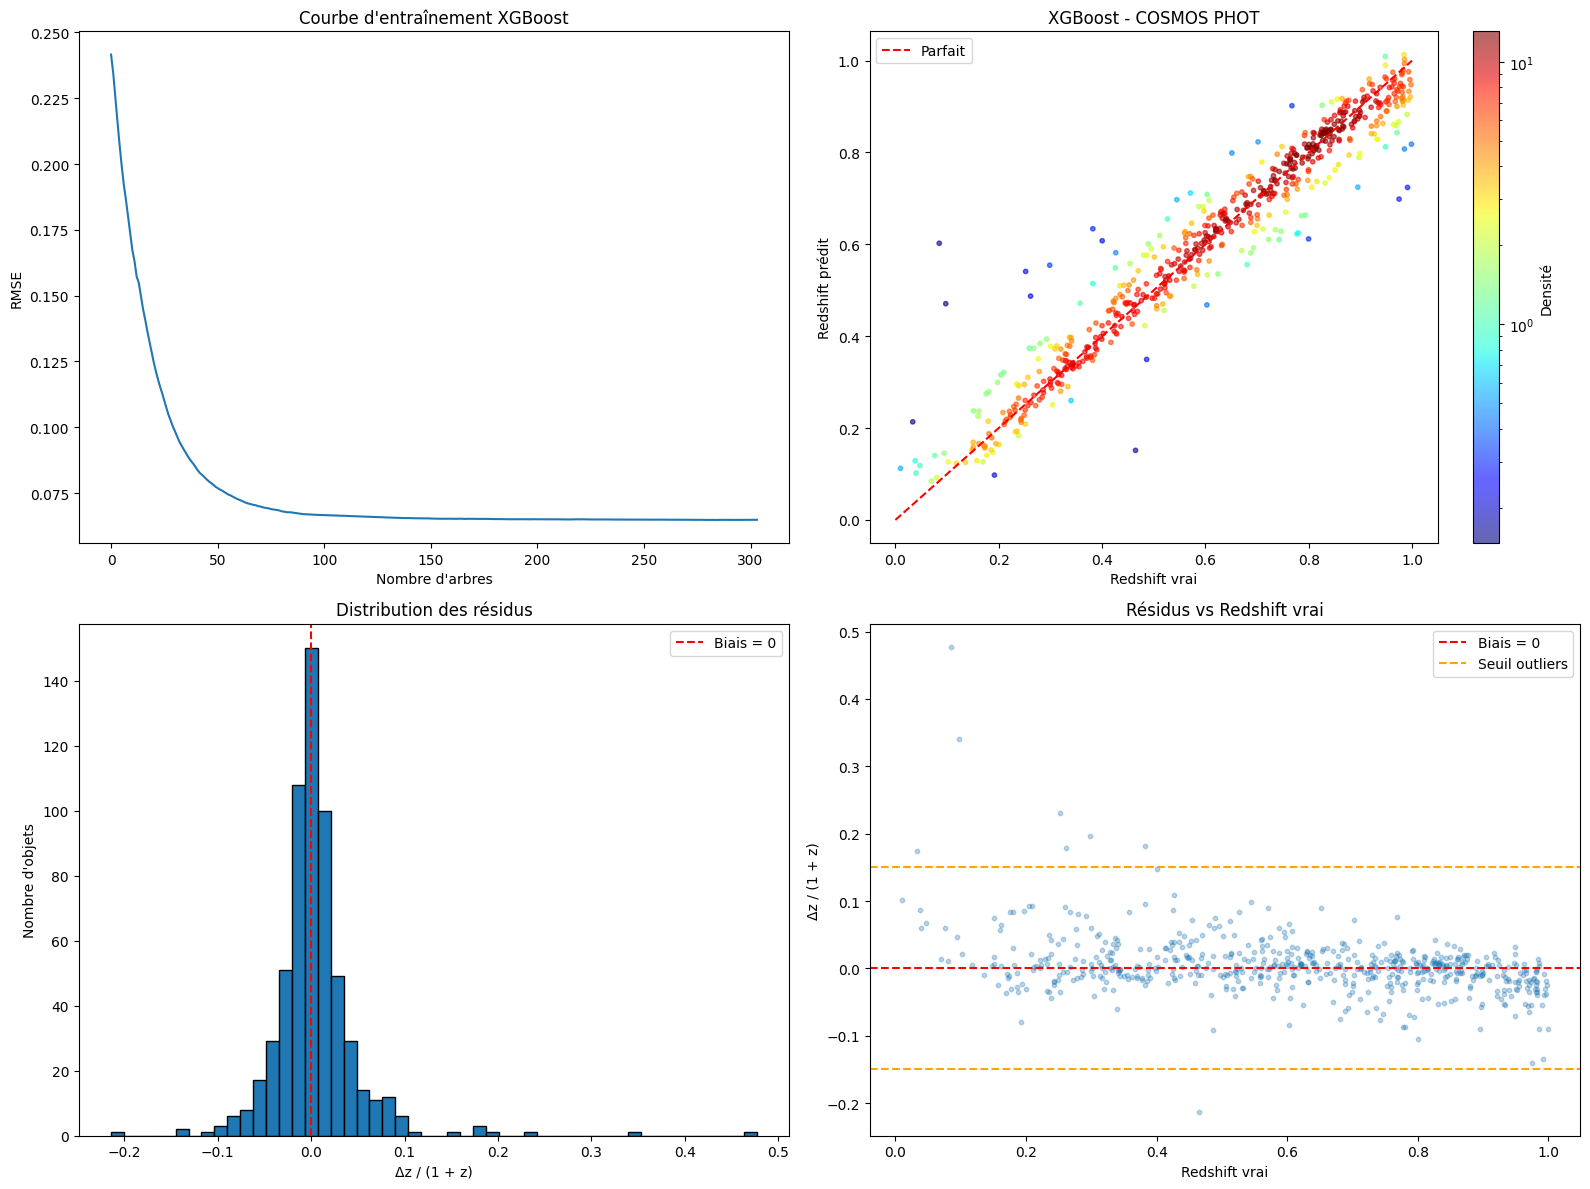

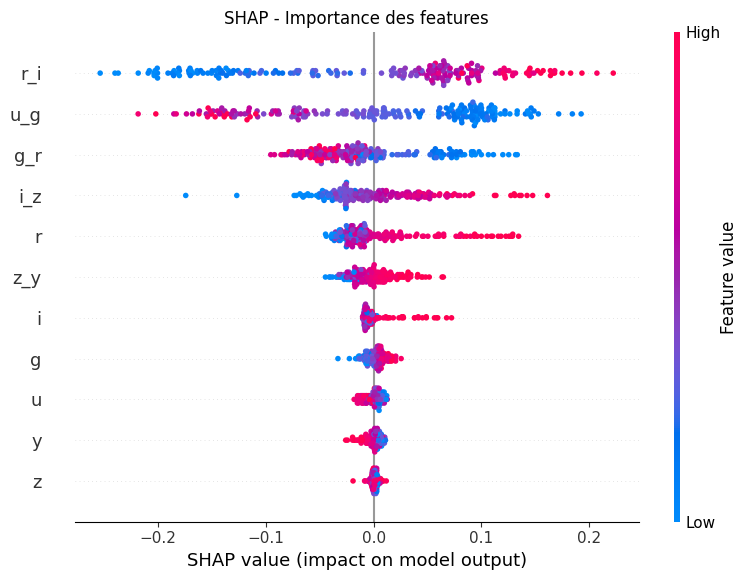

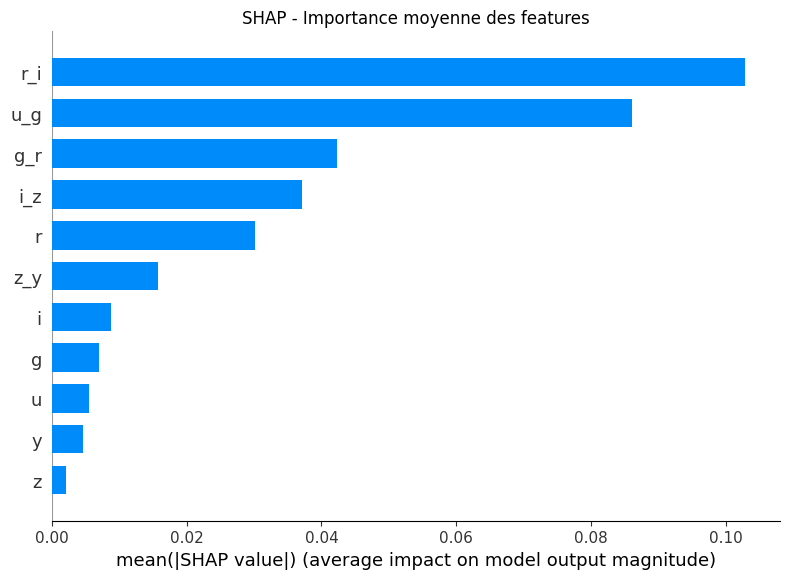

In [ ]:
import xgboost as xgb
import matplotlib.colors as mcolors

# ============================================================
# 1. PRÉPARER LES DONNÉES
# ============================================================
features = ['u', 'g', 'r', 'i', 'z', 'y', 'u_g', 'g_r', 'r_i', 'i_z', 'z_y']
X = phot_mag[features].values
y = phot_mag['redshift'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train : {len(X_train)} objets | Test : {len(X_test)} objets")

# ============================================================
# 2. ENTRAÎNER XGBOOST
# ============================================================
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse',
    early_stopping_rounds=20
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=50
)

# ============================================================
# 3. ÉVALUER
# ============================================================
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

delta_z    = (y_pred - y_test) / (1 + y_test)
biais      = np.mean(delta_z)
sigma_nmad = 1.4826 * np.median(np.abs(delta_z - np.median(delta_z)))
outliers   = np.sum(np.abs(delta_z) > 0.15) / len(delta_z) * 100

print(f"RMSE         : {rmse:.4f}")
print(f"MAE          : {mae:.4f}")
print(f"R²           : {r2:.4f}")
print(f"Biais        : {biais:.4f}")
print(f"Sigma NMAD   : {sigma_nmad:.4f}")
print(f"Outliers     : {outliers:.2f}%")

# ============================================================
# 4. GRAPHIQUES
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Courbe de loss ---
results  = xgb_model.evals_result()
val_rmse = results['validation_0']['rmse']
axes[0,0].plot(val_rmse)
axes[0,0].set_xlabel("Nombre d'arbres")
axes[0,0].set_ylabel("RMSE")
axes[0,0].set_title("Courbe d'entraînement XGBoost")

# --- Prédit vs Vrai avec densité ---
xy      = np.vstack([y_test, y_pred])
density = gaussian_kde(xy)(xy)
idx     = density.argsort()

sc = axes[0,1].scatter(y_test[idx], y_pred[idx], c=density[idx],
                        cmap='jet',
                        norm=mcolors.LogNorm(vmin=density.min(), vmax=density.max()),
                        alpha=0.6, s=10, label='')
axes[0,1].plot([0, 1], [0, 1], 'r--', label='Parfait')
axes[0,1].set_xlabel("Redshift vrai")
axes[0,1].set_ylabel("Redshift prédit")
axes[0,1].set_title("XGBoost - COSMOS PHOT")
axes[0,1].legend()
plt.colorbar(sc, ax=axes[0,1], label='Densité')

# --- Distribution des résidus ---
axes[1,0].hist(delta_z, bins=50, edgecolor='black')
axes[1,0].axvline(0, color='r', linestyle='--', label='Biais = 0')
axes[1,0].set_xlabel("Δz / (1 + z)")
axes[1,0].set_ylabel("Nombre d'objets")
axes[1,0].set_title("Distribution des résidus")
axes[1,0].legend()

# --- Résidus vs Redshift vrai ---
axes[1,1].scatter(y_test, delta_z, alpha=0.3, s=10)
axes[1,1].axhline(0,     color='r',      linestyle='--', label='Biais = 0')
axes[1,1].axhline(0.15,  color='orange', linestyle='--', label='Seuil outliers')
axes[1,1].axhline(-0.15, color='orange', linestyle='--')
axes[1,1].set_xlabel("Redshift vrai")
axes[1,1].set_ylabel("Δz / (1 + z)")
axes[1,1].set_title("Résidus vs Redshift vrai")
axes[1,1].legend()

plt.tight_layout()
plt.show()

# ============================================================
# SHAP
# ============================================================
explainer   = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test[:200])

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test[:200], feature_names=features, show=False)
plt.title("SHAP - Importance des features")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test[:200], feature_names=features, plot_type="bar", show=False)
plt.title("SHAP - Importance moyenne des features")
plt.tight_layout()
plt.show()